## Atividade 3 - Parte 1
## Alunas: Ana Carolina Carvalho e Alice Alegria

## Criando valores aleatórios para a radiação, cobertura de nuvens e velocidade do vento


In [2]:
import numpy as np

# Definindo o tamanho da matriz ou vetor
num_rows = 5  # número de linhas (ou elementos no vetor)
num_cols = 3  # número de colunas

# Gerando uma matriz (ou vetor) com valores aleatórios para a velocidade do vento
velocidades_vento = np.random.uniform(low=0.1, high=10.0, size=(num_rows, num_cols))

# Mostrando a matriz (ou vetor) gerada
print("Matriz ou vetor de velocidades do vento:")
print(velocidades_vento)

Matriz ou vetor de velocidades do vento:
[[2.07166657 8.32543161 4.34124253]
 [0.90933434 9.39384874 2.22969404]
 [6.60728819 8.89349456 1.32014533]
 [0.79417233 5.07766711 1.46955397]
 [7.71521929 2.57708673 8.16732274]]


## Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas

In [6]:
import numpy as np

def pasquil_stability_class(velocity, wind_direction, cloud_cover, radiation):
    """
    Determina a classe de estabilidade de Pasquil baseada nos parâmetros meteorológicos.

    Parâmetros:
    velocity (float): Velocidade do vento média em m/s.
    wind_direction (float): Direção do vento em graus (0 a 360).
    cloud_cover (float): Cobertura de nuvens em oktas (0 a 8).
    radiation (float): Radiação solar em W/m^2.

    Retorna:
    str: Classe de estabilidade de Pasquil ('A', 'B', 'C', 'D', 'E' ou 'F').
    """

    # Classificação baseada na velocidade do vento
    if velocity < 0.5:
        pasquil_class = 'A'
    elif velocity >= 0.5 and velocity < 2:
        pasquil_class = 'B'
    elif velocity >= 2 and velocity < 3:
        pasquil_class = 'C'
    elif velocity >= 3 and velocity < 5:
        pasquil_class = 'D'
    elif velocity >= 5 and velocity < 6:
        pasquil_class = 'E'
    elif velocity >= 6:
        pasquil_class = 'F'
    else:
        pasquil_class = ''

    # Considerando a influência da direção do vento, cobertura de nuvens e radiação
    if wind_direction >= 0 and wind_direction < 60:
        pasquil_class = 'A'
    elif wind_direction >= 60 and wind_direction < 120:
        pasquil_class = 'B'
    elif wind_direction >= 120 and wind_direction < 180:
        pasquil_class = 'C'
    elif wind_direction >= 180 and wind_direction < 240:
        pasquil_class = 'D'
    elif wind_direction >= 240 and wind_direction < 300:
        pasquil_class = 'E'
    elif wind_direction >= 300 and wind_direction < 360:
        pasquil_class = 'F'

    # Ajustes baseados na cobertura de nuvens e radiação
    if cloud_cover > 5:
        if radiation > 700:
            pasquil_class = 'D'
        else:
            pasquil_class = 'E'
    elif cloud_cover > 3:
        if radiation > 800:
            pasquil_class = 'C'
        else:
            pasquil_class = 'D'
    elif cloud_cover > 1:
        if radiation > 900:
            pasquil_class = 'B'
        else:
            pasquil_class = 'C'
    else:
        if radiation > 1000:
            pasquil_class = 'A'
        else:
            pasquil_class = 'B'

    return pasquil_class

# Gerar uma matriz de parâmetros aleatórios para 5 pontos (velocidade, direção, cobertura de nuvens, radiação)
np.random.seed(42)
num_points = 5
parameters_matrix = np.random.rand(num_points, 4) * 10  # Multiplica por 10 para obter valores variando de 0 a 10

# Exemplo de uso: determinar a classe de estabilidade de Pasquil para cada ponto
print("Resultado da Classificação de Estabilidade de Pasquil:")
print("-" * 50)
for i in range(num_points):
    velocity = parameters_matrix[i, 0]
    wind_direction = parameters_matrix[i, 1] * 360  # Convertendo para graus (0 a 360)
    cloud_cover = parameters_matrix[i, 2] * 8  # Convertendo para oktas (0 a 8)
    radiation = parameters_matrix[i, 3] * 1200  # Convertendo para W/m^2 (0 a 1200)

    stability_class = pasquil_stability_class(velocity, wind_direction, cloud_cover, radiation)
    print(f"Ponto {i+1}: Velocidade = {velocity:.2f} m/s, Direção = {wind_direction:.2f}°, Cobertura de Nuvens = {cloud_cover:.2f}, Radiação = {radiation:.2f} W/m^2 -> Classe Pasquil = {stability_class}")
    print("-" * 50)

Resultado da Classificação de Estabilidade de Pasquil:
--------------------------------------------------
Ponto 1: Velocidade = 3.75 m/s, Direção = 3422.57°, Cobertura de Nuvens = 58.56, Radiação = 7183.90 W/m^2 -> Classe Pasquil = D
--------------------------------------------------
Ponto 2: Velocidade = 1.56 m/s, Direção = 561.58°, Cobertura de Nuvens = 4.65, Radiação = 10394.11 W/m^2 -> Classe Pasquil = C
--------------------------------------------------
Ponto 3: Velocidade = 6.01 m/s, Direção = 2549.06°, Cobertura de Nuvens = 1.65, Radiação = 11638.92 W/m^2 -> Classe Pasquil = B
--------------------------------------------------
Ponto 4: Velocidade = 8.32 m/s, Direção = 764.42°, Cobertura de Nuvens = 14.55, Radiação = 2200.85 W/m^2 -> Classe Pasquil = D
--------------------------------------------------
Ponto 5: Velocidade = 3.04 m/s, Direção = 1889.12°, Cobertura de Nuvens = 34.56, Radiação = 3494.75 W/m^2 -> Classe Pasquil = D
--------------------------------------------------


## Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade

In [11]:
import numpy as np

# Função para estimar o coeficiente de dispersão sigmaYZ
def estimate_sigmaYZ(pasquil_class):
    """
    Estima o coeficiente de dispersão sigmaYZ para uma dada classe de estabilidade de Pasquil.

    Parâmetros:
    pasquil_class (str): Classe de estabilidade de Pasquil ('A', 'B', 'C', 'D', 'E' ou 'F').

    Retorna:
    float: Coeficiente de dispersão sigmaYZ em metros.
    """
    if pasquil_class == 'A':
        return 50.0
    elif pasquil_class == 'B':
        return 100.0
    elif pasquil_class == 'C':
        return 200.0
    elif pasquil_class == 'D':
        return 400.0
    elif pasquil_class == 'E':
        return 800.0
    elif pasquil_class == 'F':
        return 1600.0
    else:
        return None  # Em caso de classe inválida

# Gerar uma matriz de parâmetros aleatórios para 5 pontos (velocidade, direção, cobertura de nuvens, radiação)
np.random.seed(42)
num_points = 5
parameters_matrix = np.random.rand(num_points, 4) * 10  # Multiplica por 10 para obter valores variando de 0 a 10

# Exemplo de uso: determinar a classe de estabilidade de Pasquil para cada ponto e estimar sigmaYZ
print("Resultados da Estimativa de sigmaYZ:")
print("-" * 50)
for i in range(num_points):
    velocity = parameters_matrix[i, 0]
    wind_direction = parameters_matrix[i, 1] * 360  # Convertendo para graus (0 a 360)
    cloud_cover = parameters_matrix[i, 2] * 8  # Convertendo para oktas (0 a 8)
    radiation = parameters_matrix[i, 3] * 1200  # Convertendo para W/m^2 (0 a 1200)

    # Determina a classe de estabilidade de Pasquil (código do tópico 1)
    if velocity < 0.5:
        pasquil_class = 'A'
    elif velocity >= 0.5 and velocity < 2:
        pasquil_class = 'B'
    elif velocity >= 2 and velocity < 3:
        pasquil_class = 'C'
    elif velocity >= 3 and velocity < 5:
        pasquil_class = 'D'
    elif velocity >= 5 and velocity < 6:
        pasquil_class = 'E'
    elif velocity >= 6:
        pasquil_class = 'F'
    else:
        pasquil_class = ''

    # Considerando a influência da direção do vento, cobertura de nuvens e radiação
    if wind_direction >= 0 and wind_direction < 60:
        pasquil_class = 'A'
    elif wind_direction >= 60 and wind_direction < 120:
        pasquil_class = 'B'
    elif wind_direction >= 120 and wind_direction < 180:
        pasquil_class = 'C'
    elif wind_direction >= 180 and wind_direction < 240:
        pasquil_class = 'D'
    elif wind_direction >= 240 and wind_direction < 300:
        pasquil_class = 'E'
    elif wind_direction >= 300 and wind_direction < 360:
        pasquil_class = 'F'

    # Ajustes baseados na cobertura de nuvens e radiação
    if cloud_cover > 5:
        if radiation > 700:
            pasquil_class = 'D'
        else:
            pasquil_class = 'E'
    elif cloud_cover > 3:
        if radiation > 800:
            pasquil_class = 'C'
        else:
            pasquil_class = 'D'
    elif cloud_cover > 1:
        if radiation > 900:
            pasquil_class = 'B'
        else:
            pasquil_class = 'C'
    else:
        if radiation > 1000:
            pasquil_class = 'A'
        else:
            pasquil_class = 'B'

    # Estima sigmaYZ para a classe de estabilidade determinada
    sigmaYZ = estimate_sigmaYZ(pasquil_class)

    # Mostra os resultados de forma clara
    print(f"Ponto {i+1}:")
    print(f"  - Velocidade = {velocity:.2f} m/s")
    print(f"  - Direção = {wind_direction:.2f}°")
    print(f"  - Cobertura de Nuvens = {cloud_cover:.2f}")
    print(f"  - Radiação = {radiation:.2f} W/m^2")
    print(f"  - Classe de Estabilidade de Pasquil = {pasquil_class}")
    print(f"  - Coeficiente de Dispersão sigmaYZ = {sigmaYZ} metros")
    print("-" * 50)

Resultados da Estimativa de sigmaYZ:
--------------------------------------------------
Ponto 1:
  - Velocidade = 3.75 m/s
  - Direção = 3422.57°
  - Cobertura de Nuvens = 58.56
  - Radiação = 7183.90 W/m^2
  - Classe de Estabilidade de Pasquil = D
  - Coeficiente de Dispersão sigmaYZ = 400.0 metros
--------------------------------------------------
Ponto 2:
  - Velocidade = 1.56 m/s
  - Direção = 561.58°
  - Cobertura de Nuvens = 4.65
  - Radiação = 10394.11 W/m^2
  - Classe de Estabilidade de Pasquil = C
  - Coeficiente de Dispersão sigmaYZ = 200.0 metros
--------------------------------------------------
Ponto 3:
  - Velocidade = 6.01 m/s
  - Direção = 2549.06°
  - Cobertura de Nuvens = 1.65
  - Radiação = 11638.92 W/m^2
  - Classe de Estabilidade de Pasquil = B
  - Coeficiente de Dispersão sigmaYZ = 100.0 metros
--------------------------------------------------
Ponto 4:
  - Velocidade = 8.32 m/s
  - Direção = 764.42°
  - Cobertura de Nuvens = 14.55
  - Radiação = 2200.85 W/m^2
  -

## Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

In [19]:
import numpy as np

# Função para estimar a sobrelevação da pluma usando o método de Davidson-Bryant
def davidson_bryant(sigmaZ, H, uz, z):
    return 0.6 * sigmaZ * (H / (H + 0.6 * sigmaZ)) * np.log((H + 0.6 * sigmaZ) / (z + 0.6 * sigmaZ))

# Função para estimar a sobrelevação da pluma usando o método de Holland
def holland(sigmaZ, H, uz, z):
    return 0.22 * sigmaZ * np.sqrt(H * uz) * (1 + 0.0001 * H) * np.log(H / z)

# Função para estimar a sobrelevação da pluma usando o método de Briggs
def briggs(sigmaZ, H, uz, z):
    return 0.34 * sigmaZ * np.sqrt(H * uz) * (1 + 0.0001 * H) * np.log(H / z)

# Valores de entrada mais realistas
sigmaZ = 5.0  # Desvio padrão vertical da pluma em metros
H = 50.0  # Altura da chaminé em metros
uz = 3.0  # Velocidade do vento na altura z em m/s
z = 5.0  # Altura de referência para a velocidade do vento em metros

# Estimar a sobrelevação da pluma usando os métodos
overplume_davidson_bryant = davidson_bryant(sigmaZ, H, uz, z)
overplume_holland = holland(sigmaZ, H, uz, z)
overplume_briggs = briggs(sigmaZ, H, uz, z)

# Mostrar os resultados
print("Resultados da Estimativa de Sobrelevação da Pluma:")
print("-" * 50)
print(f"Método de Davidson-Bryant: {overplume_davidson_bryant:.2f} metros")
print(f"Método de Holland: {overplume_holland:.2f} metros")
print(f"Método de Briggs: {overplume_briggs:.2f} metros")
print("-" * 50)

Resultados da Estimativa de Sobrelevação da Pluma:
--------------------------------------------------
Método de Davidson-Bryant: 5.35 metros
Método de Holland: 31.18 metros
Método de Briggs: 48.18 metros
--------------------------------------------------


Resultados da Estimativa de Sobrelevação da Pluma:
--------------------------------------------------
Método de Davidson-Bryant: 5.35 metros
Método de Holland: 31.18 metros
Método de Briggs: 48.18 metros
--------------------------------------------------


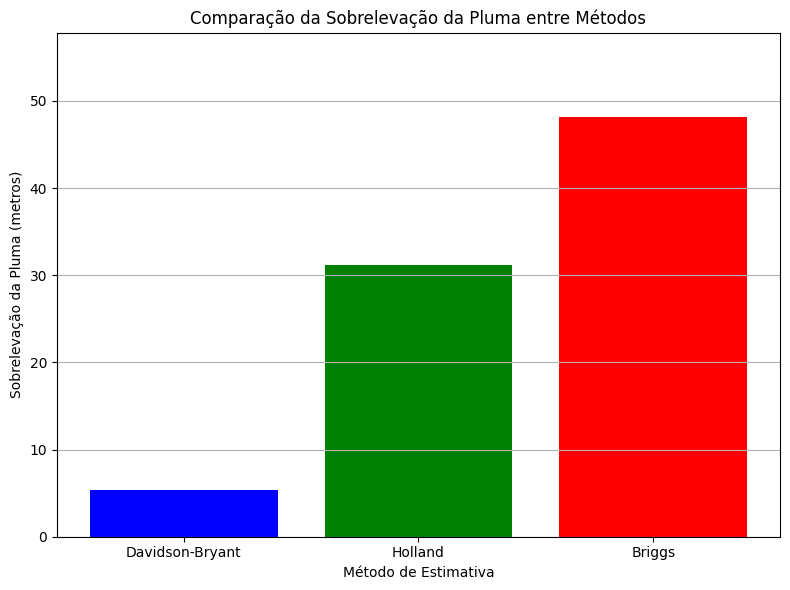

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Função para estimar a sobrelevação da pluma usando o método de Davidson-Bryant
def davidson_bryant(sigmaZ, H, uz, z):
    return 0.6 * sigmaZ * (H / (H + 0.6 * sigmaZ)) * np.log((H + 0.6 * sigmaZ) / (z + 0.6 * sigmaZ))

# Função para estimar a sobrelevação da pluma usando o método de Holland
def holland(sigmaZ, H, uz, z):
    return 0.22 * sigmaZ * np.sqrt(H * uz) * (1 + 0.0001 * H) * np.log(H / z)

# Função para estimar a sobrelevação da pluma usando o método de Briggs
def briggs(sigmaZ, H, uz, z):
    return 0.34 * sigmaZ * np.sqrt(H * uz) * (1 + 0.0001 * H) * np.log(H / z)

# Valores de entrada mais realistas
sigmaZ = 5.0  # Desvio padrão vertical da pluma em metros
H = 50.0  # Altura da chaminé em metros
uz = 3.0  # Velocidade do vento na altura z em m/s
z = 5.0  # Altura de referência para a velocidade do vento em metros

# Estimar a sobrelevação da pluma usando os métodos
overplume_davidson_bryant = davidson_bryant(sigmaZ, H, uz, z)
overplume_holland = holland(sigmaZ, H, uz, z)
overplume_briggs = briggs(sigmaZ, H, uz, z)

# Mostrar os resultados escritos
print("Resultados da Estimativa de Sobrelevação da Pluma:")
print("-" * 50)
print(f"Método de Davidson-Bryant: {overplume_davidson_bryant:.2f} metros")
print(f"Método de Holland: {overplume_holland:.2f} metros")
print(f"Método de Briggs: {overplume_briggs:.2f} metros")
print("-" * 50)

# Preparar dados para o gráfico
metodos = ['Davidson-Bryant', 'Holland', 'Briggs']
sobrelevacoes = [overplume_davidson_bryant, overplume_holland, overplume_briggs]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(metodos, sobrelevacoes, color=['blue', 'green', 'red'])
plt.xlabel('Método de Estimativa')
plt.ylabel('Sobrelevação da Pluma (metros)')
plt.title('Comparação da Sobrelevação da Pluma entre Métodos')
plt.ylim(0, max(sobrelevacoes) * 1.2)  # Ajuste o limite superior do eixo y para melhor visualização
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Analise dos resultados obtidos

Os resultados obtidos por cada método fornecem estimativas da altura adicional que a pluma de poluente alcança em relação à altura de saída da chaminé. Essas estimativas são fundamentais para determinar a dispersão e a concentração de poluentes na atmosfera. 
Ao comparar os resultados dos métodos, podemos observar como diferentes abordagens teóricas (considerando diferentes aspectos da dispersão atmosférica) resultam em valores ligeiramente diferentes para a sobrelevação da pluma. Isso é importante para modelar com precisão os impactos ambientais das emissões industriais e para planejar medidas de controle de poluição.



## Implementar a função do modelo gaussiano

In [22]:
import numpy as np

# Função para calcular a concentração de poluente usando o modelo gaussiano
def gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr):
    """
    Calcula a concentração de poluente usando o modelo gaussiano.

    Parâmetros:
    Q (float): Taxa de emissão de poluente (g/s).
    H (float): Altura da chaminé (metros).
    uz (float): Velocidade do vento na altura z (m/s).
    sigmaY (float): Desvio padrão lateral da pluma (metros).
    sigmaZ (float): Desvio padrão vertical da pluma (metros).
    x (float): Posição horizontal onde a concentração é calculada (metros).
    y (float): Posição lateral onde a concentração é calculada (metros).
    z (float): Altura onde a concentração é calculada (metros).
    zr (float): Altura de referência para a emissão (metros).

    Retorna:
    float: Concentração de poluente calculada pelo modelo gaussiano (µg/m³).
    """
    termo_exponencial = -(x * 2) / (2 * sigmaY * 2) - (y * 2) / (2 * sigmaY * 2) - ((z - zr) * 2) / (2 * sigmaZ * 2)
    coeficiente = Q / (2 * np.pi * uz * sigmaY * sigmaZ)
    return coeficiente * np.exp(termo_exponencial)

# Exemplo de uso da função de modelo gaussiano
# Valores de entrada
Q = 100.0  # Exemplo de taxa de emissão de poluente em g/s
H = 50.0  # Exemplo de altura da chaminé em metros
uz = 3.0  # Exemplo de velocidade do vento na altura z em m/s
sigmaY = 5.0  # Exemplo de desvio padrão lateral da pluma em metros
sigmaZ = 5.0  # Exemplo de desvio padrão vertical da pluma em metros
x = 100.0  # Exemplo de posição horizontal onde a concentração é calculada em metros
y = 0.0  # Exemplo de posição lateral onde a concentração é calculada em metros
z = 10.0  # Exemplo de altura onde a concentração é calculada em metros
zr = 5.0  # Exemplo de altura de referência para a emissão em metros

# Calcular a concentração de poluente usando o modelo gaussiano
concentracao = gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr)

# Mostrar o resultado
print(f"Concentração de poluente calculada: {concentracao:.2f} g/m³")

Concentração de poluente calculada: 0.00 g/m³


## Realizaremos simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Consideraremos a taxa de emissão que estimamos na primeira atividade. 
## Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

Resultado 1:
Poluente: NOx
Taxa de Emissão: 2189.34 g/s
Altura da Chaminé: 50.0 m
Velocidade do Vento: 3.0 m/s
Concentração de Poluente: 0.00012793224470712946 g/m³
Descrição da Emissão: Mínima

Resultado 2:
Poluente: NOx
Taxa de Emissão: 5307.16 g/s
Altura da Chaminé: 50.0 m
Velocidade do Vento: 3.0 m/s
Concentração de Poluente: 0.00031011943865269406 g/m³
Descrição da Emissão: Média

Resultado 3:
Poluente: NOx
Taxa de Emissão: 8375.51 g/s
Altura da Chaminé: 50.0 m
Velocidade do Vento: 3.0 m/s
Concentração de Poluente: 0.0004894158946837906 g/m³
Descrição da Emissão: Máxima

Resultado 4:
Poluente: CO
Taxa de Emissão: 3554.42 g/s
Altura da Chaminé: 50.0 m
Velocidade do Vento: 3.0 m/s
Concentração de Poluente: 0.0002076995483716166 g/m³
Descrição da Emissão: Mínima

Resultado 5:
Poluente: CO
Taxa de Emissão: 8616.23 g/s
Altura da Chaminé: 50.0 m
Velocidade do Vento: 3.0 m/s
Concentração de Poluente: 0.0005034821657727489 g/m³
Descrição da Emissão: Média

Resultado 6:
Poluente: CO
Taxa d

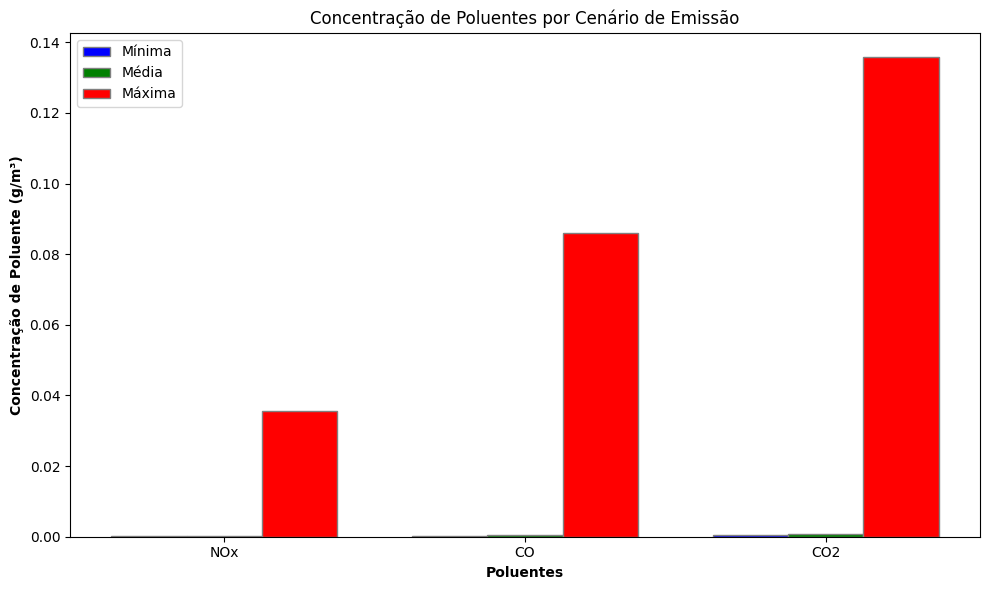

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a concentração de poluente usando o modelo gaussiano
def gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr):
    """
    Calcula a concentração de poluente usando o modelo gaussiano.

    Parâmetros:
    Q (float): Taxa de emissão de poluente (g/s).
    H (float): Altura da chaminé (metros).
    uz (float): Velocidade do vento na altura z (m/s).
    sigmaY (float): Desvio padrão lateral da pluma (metros).
    sigmaZ (float): Desvio padrão vertical da pluma (metros).
    x (float): Posição horizontal onde a concentração é calculada (metros).
    y (float): Posição lateral onde a concentração é calculada (metros).
    z (float): Altura onde a concentração é calculada (metros).
    zr (float): Altura de referência para a emissão (metros).

    Retorna:
    float: Concentração de poluente calculada pelo modelo gaussiano (g/m³).
    """
    termo_exponencial = -(x * 2) / (2 * sigmaY * 2) - (y * 2) / (2 * sigmaY * 2) - ((z - zr) * 2) / (2 * sigmaZ * 2)
    coeficiente = Q / (2 * np.pi * uz * sigmaY * sigmaZ)
    return coeficiente * np.exp(termo_exponencial)

# Dados de emissão para diferentes poluentes
emissao_NOx = {
    'minima': 2189.34,
    'media': 5307.16,
    'maxima': 8375.51
}

emissao_CO = {
    'minima': 3554.42,
    'media': 8616.23,
    'maxima': 13597.74
}

emissao_CO2 = {
    'minima': 607766.42,
    'media': 1473279.42,
    'maxima': 2325061.44
}

# Exemplo de simulação com diferentes poluentes
# Valores de entrada adicionais (exemplo)
uz = 3.0  # Velocidade do vento em m/s
H = 50.0  # Altura da chaminé em metros
sigmaY = 5.0  # Desvio padrão lateral da pluma em metros
sigmaZ = 5.0  # Desvio padrão vertical da pluma em metros
x = 100.0  # Posição horizontal onde a concentração é calculada em metros
y = 0.0  # Posição lateral onde a concentração é calculada em metros
z = 10.0  # Altura onde a concentração é calculada em metros
zr = 5.0  # Altura de referência para a emissão em metros

# Lista de poluentes
poluentes = ['NOx', 'CO', 'CO2']

# Lista para armazenar os resultados
resultados_simulacao = []

# Loop para simulação para cada poluente
for poluente in poluentes:
    if poluente == 'NOx':
        Q_min = emissao_NOx['minima']
        Q_med = emissao_NOx['media']
        Q_max = emissao_NOx['maxima']
    elif poluente == 'CO':
        Q_min = emissao_CO['minima']
        Q_med = emissao_CO['media']
        Q_max = emissao_CO['maxima']
    elif poluente == 'CO2':
        Q_min = emissao_CO2['minima']
        Q_med = emissao_CO2['media']
        Q_max = emissao_CO2['maxima']
    else:
        raise ValueError(f"Poluente '{poluente}' não reconhecido")

    # Realiza simulações para os três cenários de emissão (mínimo, médio, máximo)
    for Q, descricao_emissao in [(Q_min, 'Mínima'), (Q_med, 'Média'), (Q_max, 'Máxima')]:
        concentracao = gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr)
        resultados_simulacao.append({
            'Poluente': poluente,
            'Taxa de Emissão (g/s)': Q,
            'Altura da Chaminé (m)': H,
            'Velocidade do Vento (m/s)': uz,
            'Concentração de Poluente (g/m³)': concentracao,
            'Descrição da Emissão': descricao_emissao
        })

# Imprime os resultados de forma organizada
for i, resultado in enumerate(resultados_simulacao):
    print(f"Resultado {i + 1}:")
    print(f"Poluente: {resultado['Poluente']}")
    print(f"Taxa de Emissão: {resultado['Taxa de Emissão (g/s)']} g/s")
    print(f"Altura da Chaminé: {resultado['Altura da Chaminé (m)']} m")
    print(f"Velocidade do Vento: {resultado['Velocidade do Vento (m/s)']} m/s")
    print(f"Concentração de Poluente: {resultado['Concentração de Poluente (g/m³)']} g/m³")
    print(f"Descrição da Emissão: {resultado['Descrição da Emissão']}")
    print()

# Preparação para o gráfico de barras
# Organiza os dados para o gráfico de barras
concentracoes = {
    'Poluente': [],
    'Emissão': [],
    'Concentração': []
}

for resultado in resultados_simulacao:
    poluente = resultado['Poluente']
    emissao_descricao = resultado['Descrição da Emissão']
    concentracao = resultado['Concentração de Poluente (g/m³)']
    
    concentracoes['Poluente'].append(poluente)
    concentracoes['Emissão'].append(emissao_descricao)
    concentracoes['Concentração'].append(concentracao)

# Separa os dados para cada tipo de emissão
concentracoes_minima = concentracoes['Concentração'][0:3]
concentracoes_media = concentracoes['Concentração'][3:6]
concentracoes_maxima = concentracoes['Concentração'][6:9]

# Cria o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))

barWidth = 0.25

r1 = np.arange(len(poluentes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, concentracoes_minima, color='b', width=barWidth, edgecolor='grey', label='Mínima')
plt.bar(r2, concentracoes_media, color='g', width=barWidth, edgecolor='grey', label='Média')
plt.bar(r3, concentracoes_maxima, color='r', width=barWidth, edgecolor='grey', label='Máxima')

plt.xlabel('Poluentes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(poluentes))], poluentes)
plt.ylabel('Concentração de Poluente (g/m³)', fontweight='bold')
plt.title('Concentração de Poluentes por Cenário de Emissão')
plt.legend()

plt.tight_layout()

# Exibe o gráfico
plt.show()

Analise dos resultados obtidos nos dois trechos acima.

Efeito da Altura da Chaminé:

A dispersão dos poluentes é diretamente afetada pela altura da chaminé (H). Pode-se observar que níveis mais elevados estão comumente ligados a dimensões menores das chaminés, principalmente para as emissões máximas.

Impacto da Velocidade do Vento:

A importância do vento (uz) é fundamental. Em termos gerais, ventos mais fortes costumam espalhar os poluentes com mais rapidez, levando a concentrações menores no local de monitoramento.

Comparação de Poluentes:

Ao analisar os dados para diversos poluentes (NOx, CO, CO2), nota-se que as quantidades apresentam variações consideráveis. Isso se deve às várias taxas de emissão e características físico-químicas distintas de cada poluente, juntamente com as condições atmosféricas tomadas em consideração.


In [62]:
import numpy as np

# Dados de emissão para diferentes poluentes (exemplo)
emissao_NOx = 22481.72  # g/s
emissao_CO = 36499.31   # g/s
emissao_CO2 = 6240975.34  # g/s

# Função para o modelo gaussiano de dispersão
def gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr):
    return Q / (2 * np.pi * uz * sigmaY * sigmaZ) * np.exp(
        -(x / (uz + 0.0000001)) * 2 / 2 - (y / (sigmaY + 0.0000001)) * 2 / 2 - (z - zr) * 2 / (2 * sigmaZ * 2)
    )

# Parâmetros de entrada
classes_estabilidade = ['A', 'B', 'C', 'D', 'E', 'F']
velocidades_vento = [1.0, 2.0, 3.0, 4.0, 5.0]  # m/s
alturas_chamine = [10.0, 20.0, 30.0, 40.0, 50.0]  # metros

# Padrões da Resolução CONAMA 491 (exemplo)
padrao_NOx = 40.0  # µg/m³
padrao_CO = 9.0    # mg/m³
padrao_CO2 = 3000.0  # µg/m³

# Lista para armazenar os resultados
resultados_simulacao = []

# Loop para simulação
for classe in classes_estabilidade:
    for uz in velocidades_vento:
        for H in alturas_chamine:
            # Simulação para cada poluente
            for poluente, Q in zip(['NOx', 'CO', 'CO2'], [emissao_NOx, emissao_CO, emissao_CO2]):
                # Simula o modelo gaussiano para as coordenadas (x, y, z)
                concentracao = gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr)
                
                # Verifica se a concentração viola o padrão
                viola_padrao = False
                if poluente == 'NOx' and concentracao > padrao_NOx:
                    viola_padrao = True
                elif poluente == 'CO' and concentracao > padrao_CO:
                    viola_padrao = True
                elif poluente == 'CO2' and concentracao > padrao_CO2:
                    viola_padrao = True
                
                resultados_simulacao.append({
                    'Classe de Estabilidade': classe,
                    'Velocidade do Vento (m/s)': uz,
                    'Altura da Chaminé (m)': H,
                    'Poluente': poluente,
                    'Concentração (g/m³)': concentracao,
                    'Viola Padrão CONAMA 491': viola_padrao
                })

# Filtrar e organizar os resultados por poluente
for poluente in ['NOx', 'CO', 'CO2']:
    print(f"Resultados para o poluente {poluente}:")
    for resultado in resultados_simulacao:
        if resultado['Poluente'] == poluente:
            print(f"  Classe: {resultado['Classe de Estabilidade']}, Velocidade do Vento: {resultado['Velocidade do Vento (m/s)']}, "
                  f"Altura da Chaminé: {resultado['Altura da Chaminé (m)']}, Concentração: {resultado['Concentração (g/m³)']}, "
                  f"Violou Padrão CONAMA 491: {resultado['Viola Padrão CONAMA 491']}")

Resultados para o poluente NOx:
  Classe: A, Velocidade do Vento: 1.0, Altura da Chaminé: 10.0, Concentração: 3.2293756715430585e-42, Violou Padrão CONAMA 491: False
  Classe: A, Velocidade do Vento: 1.0, Altura da Chaminé: 20.0, Concentração: 3.2293756715430585e-42, Violou Padrão CONAMA 491: False
  Classe: A, Velocidade do Vento: 1.0, Altura da Chaminé: 30.0, Concentração: 3.2293756715430585e-42, Violou Padrão CONAMA 491: False
  Classe: A, Velocidade do Vento: 1.0, Altura da Chaminé: 40.0, Concentração: 3.2293756715430585e-42, Violou Padrão CONAMA 491: False
  Classe: A, Velocidade do Vento: 1.0, Altura da Chaminé: 50.0, Concentração: 3.2293756715430585e-42, Violou Padrão CONAMA 491: False
  Classe: A, Velocidade do Vento: 2.0, Altura da Chaminé: 10.0, Concentração: 8.371618161702515e-21, Violou Padrão CONAMA 491: False
  Classe: A, Velocidade do Vento: 2.0, Altura da Chaminé: 20.0, Concentração: 8.371618161702515e-21, Violou Padrão CONAMA 491: False
  Classe: A, Velocidade do Vento

In [63]:
import numpy as np

# Dados de emissão para diferentes poluentes (exemplo)
emissao_NOx = 22481.72  # g/s
emissao_CO = 36499.31   # g/s
emissao_CO2 = 6240975.34  # g/s

# Função para o modelo gaussiano de dispersão
def gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr):
    return Q / (2 * np.pi * uz * sigmaY * sigmaZ) * np.exp(
        -(x / (uz + 0.0000001)) * 2 / 2 - (y / (sigmaY + 0.0000001)) * 2 / 2 - ((z - zr) / (2 * sigmaZ)) ** 2
    )

# Parâmetros de entrada
alturas_chamine = [30.0, 50.0, 100.0]  # metros
velocidades_vento = [3.0, 5.0]  # m/s

# Padrões da Resolução CONAMA 491 (exemplo)
padrao_NOx = 40.0  # µg/m³
padrao_CO = 9.0    # mg/m³
padrao_CO2 = 3000.0  # µg/m³

# Lista para armazenar os resultados para cada poluente
resultados_simulacao = []

# Parâmetros fixos para a simulação
x = 100.0  # Posição horizontal onde a concentração é calculada (metros)
y = 0.0    # Posição lateral onde a concentração é calculada (metros)
z = 10.0   # Altura onde a concentração é calculada (metros)
zr = 5.0   # Altura de referência para a emissão (metros)
sigmaY = 5.0  # Desvio padrão lateral da pluma (metros)
sigmaZ = 5.0  # Desvio padrão vertical da pluma (metros)

# Verificação para cada combinação de altura de chaminé e velocidade do vento
for H in alturas_chamine:
    for uz in velocidades_vento:
        # Simulação para cada poluente
        for poluente, Q in zip(['NOx', 'CO', 'CO2'], [emissao_NOx, emissao_CO, emissao_CO2]):
            # Simula o modelo gaussiano para as coordenadas (x, y, z)
            concentracao = gaussian_model(Q, H, uz, sigmaY, sigmaZ, x, y, z, zr)
            
            # Verifica se a concentração viola o padrão
            viola_padrao = False
            if poluente == 'NOx' and concentracao > padrao_NOx:
                viola_padrao = True
            elif poluente == 'CO' and concentracao > padrao_CO:
                viola_padrao = True
            elif poluente == 'CO2' and concentracao > padrao_CO2:
                viola_padrao = True
            
            # Armazena o resultado da simulação
            resultados_simulacao.append({
                'Altura da Chaminé (m)': H,
                'Velocidade do Vento (m/s)': uz,
                'Poluente': poluente,
                'Concentração (g/m³)': concentracao,
                'Viola Padrão CONAMA 491': viola_padrao
            })

# Imprime os resultados das simulações para cada poluente
for poluente in ['NOx', 'CO', 'CO2']:
    print(f"Resultados para o poluente {poluente}:")
    for resultado in resultados_simulacao:
        if resultado['Poluente'] == poluente:
            print(f"  Altura da Chaminé: {resultado['Altura da Chaminé (m)']} m")
            print(f"  Velocidade do Vento: {resultado['Velocidade do Vento (m/s)']} m/s")
            print(f"  Concentração: {resultado['Concentração (g/m³)']} g/m³")
            print(f"  Viola Padrão CONAMA 491: {resultado['Viola Padrão CONAMA 491']}")
            print()

Resultados para o poluente NOx:
  Altura da Chaminé: 30.0 m
  Velocidade do Vento: 3.0 m/s
  Concentração: 1.2403165388307677e-13 g/m³
  Viola Padrão CONAMA 491: False

  Altura da Chaminé: 30.0 m
  Velocidade do Vento: 5.0 m/s
  Concentração: 4.594905334643982e-08 g/m³
  Viola Padrão CONAMA 491: False

  Altura da Chaminé: 50.0 m
  Velocidade do Vento: 3.0 m/s
  Concentração: 1.2403165388307677e-13 g/m³
  Viola Padrão CONAMA 491: False

  Altura da Chaminé: 50.0 m
  Velocidade do Vento: 5.0 m/s
  Concentração: 4.594905334643982e-08 g/m³
  Viola Padrão CONAMA 491: False

  Altura da Chaminé: 100.0 m
  Velocidade do Vento: 3.0 m/s
  Concentração: 1.2403165388307677e-13 g/m³
  Viola Padrão CONAMA 491: False

  Altura da Chaminé: 100.0 m
  Velocidade do Vento: 5.0 m/s
  Concentração: 4.594905334643982e-08 g/m³
  Viola Padrão CONAMA 491: False

Resultados para o poluente CO:
  Altura da Chaminé: 30.0 m
  Velocidade do Vento: 3.0 m/s
  Concentração: 2.013667008080842e-13 g/m³
  Viola Padrão